In [4]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from dmba import classificationSummary
from dmba import AIC_score
from dmba import backward_elimination, forward_selection, stepwise_selection
%matplotlib inline

In [5]:
bank_df = pd.read_csv("D:/dmba/banks.csv")
bank_df.head()

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


In [6]:
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]
bank_df.columns = [c.replace('&', '') for c in bank_df.columns]
bank_df.columns = [c.replace('/', '_') for c in bank_df.columns]

In [7]:
bank_df.drop(columns=['Obs', 'TotCap_Assets'], inplace=True)
bank_df.head()

,Financial_Condition,TotExp_Assets,TotLnsLses_Assets
0,1,0.12,0.65
1,1,0.11,0.62
2,1,0.09,1.02
3,1,0.10,0.67
4,1,0.11,0.69


In [8]:
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
y = bank_df['Financial_Condition']
X = bank_df.drop(columns=['Financial_Condition'])
logit_reg.fit(X, y)
print('intercept', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('AIC', AIC_score(y, logit_reg.predict(X), df=len(X.columns)+1))


intercept -14.720832806179029
       TotExp_Assets  TotLnsLses_Assets
coeff      89.832567           8.371267
AIC 18.705839468305996


In [6]:
# 예측 변수의 함수로서 로짓, 
# 예측 변수의 함수로서 오즈,
# 예측 변수의 함수로서 확률
logit = -14.7208 + (89.8326 * TotExp_Assets) + (8.3713 * TotLnsLses_Assets)
Odds = e^(logit) = e^(-14.7208 + (89.8326 * TotExp_Assets) + (8.3713 * TotLnsLses_Assets))
p = (1+Exp[-(-14.7208 + (89.8326 * TotExp_Assets) + (8.3713 * TotLnsLses_Assets))])^-1

SyntaxError: cannot assign to operator (1446291531.py, line 2)

In [9]:
new_bank = pd.DataFrame([[0.11, 0.6]], columns=['TotExp_Assets', 'TotLns_Lses_Assets'])
new_bank

,TotExp_Assets,TotLns_Lses_Assets
0,0.11,0.6


In [11]:
logit_new = -14.7210 + (89.8339 * new_bank.TotExp_Assets) + (8.3713 * new_bank.TotLns_Lses_Assets)
print("logit = ", logit_new)
odds = math.exp(-logit_new)
print("odds = ", odds)
prob = 1/(1+odds)
print("prob =")

logit =  0    0.183509
dtype: float64
odds =  0.8323443846047233
prob =


C:\Users\USER\AppData\Local\Temp\ipykernel_7320\3304282962.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  odds = math.exp(-logit_new)


In [15]:
admin_df = pd.read_csv("D:/dmba/SystemAdministrators.csv")
admin_df.head()
admin_df

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes
...,...,...,...
70,5.6,4,No
71,5.9,8,No
72,6.4,6,No
73,3.8,4,No


In [16]:
admin_df.columns = [c.replace(' ', '_') for c in admin_df.columns]
admin_df.columns

Index(['Experience', 'Training', 'Completed_task'], dtype='object')

In [18]:
admin_df.loc[admin_df.Completed_task == 'Yes', 'Completed_task'] = 1
admin_df.loc[admin_df.Completed_task == 'No', 'Completed_task'] = 0
admin_df

,Experience,Training,Completed_task
0,10.9,4,1
1,9.9,4,1
2,10.4,6,1
3,13.7,6,1
4,9.4,8,1
...,...,...,...
70,5.6,4,0
71,5.9,8,0
72,6.4,6,0
73,3.8,4,0


Text(0, 0.5, 'Experience')

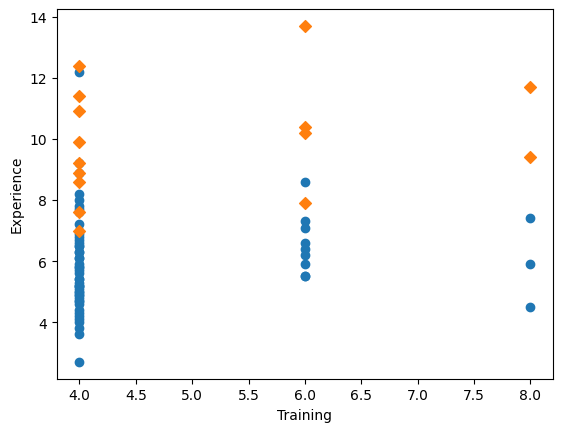

In [20]:
fig, ax = plt.subplots()
subset = admin_df.loc[admin_df['Completed_task']==0]
ax.scatter(subset.Training, subset.Experience, marker='o', label='No')
subset1 = admin_df.loc[admin_df['Completed_task']==1]
ax.scatter(subset1.Training, subset1.Experience, marker='D', label='Yes')
plt.xlabel('Training')
plt.ylabel('Experience')

In [1]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
admin_df.Completed_task = admin_df.Completed_task.astype('category')
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='linlinear')
y = admin_df['Completed_task']
X = admin_df.drop(columns=['Completed_task'])
classes = list(y.cat.categories)
logit_reg.fit(X, y)
y_pred = logit_reg.predict(X)
classificationSummary(y, y_pred, class_names=classes)


NameError: name 'ax' is not defined